Variant: Malysh Igor Igorevich

at this test, I used LLM model as an assistant, not as the main author of the analysis.
Specifically:

I asked for code snippets for standard statistical tests.

I requested recommendations for formatting graphs and Markdown comments so that the notebook is consistent.

All data loading, writing code, execution of code, interpretation of results, and final conclusions were done by me,
based on the dataset and the course requirements.


LLM was used as a support tool for:

Speed up the search for Python libraries,

Speeding up the writing of small pieces of code,

checking the correctness of statistical methods

formatting comments using Markdown, where is it required

Therefore, LLM was not the author of the work, but a helper for coding and structuring. The analysis, choice of variables, and interpretation remain my own.



Used LLMs: https://chatgpt.com/

Evaluation of the effectiveness of application: in all use-cases, the used models showed acceptable results


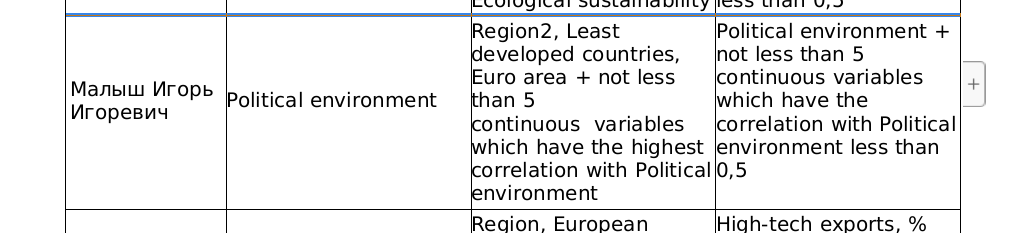

In [542]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import warnings
warnings.filterwarnings("ignore")


df = pd.read_excel('WIPO-GII_2022.xlsx')


df.head()


,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,Cote d'Ivoire,48.3,21.8,5.1,1.2,0.3,6.0,2.1,3.4,23.7,...,4.0,38.5,Sub-Saharan Africa,Sub-Saharan Africa,0,0,0,0,middle income,0
1,Czechia,42.1,46.2,30.4,40.6,100.0,29.9,15.3,10.3,47.3,...,42.6,59.1,Europe & Central Asia,Europe,0,1,1,0,high income,1
2,"Egypt, Arab Rep.",45.0,20.4,18.0,9.1,16.9,14.1,0.0,30.9,25.4,...,24.1,47.0,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0
3,"Hong Kong SAR, China",69.7,46.7,38.4,47.4,100.0,53.2,3.0,10.8,56.3,...,55.6,62.9,East Asia & Pacific,Asia-Pacific,0,0,0,0,high income,1
4,"Iran, Islamic Rep.",13.3,18.6,22.1,4.0,1.2,31.8,4.2,26.6,14.7,...,37.5,27.7,Middle East & North Africa,Middle East and North Africa,0,0,0,0,middle income,0


1.1.Do the descriptive analysis of all the variables which will be used in cluster analysis. Prove that the selected variables could be used simultaneously in one cluster model.

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 55 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Country                                                                         139 non-null    object 
 1   Business environment_2022                                                       132 non-null    float64
 2   Business sophistication index_2022                                              132 non-null    float64
 3   Citable documents H-index_2022                                                  132 non-null    float64
 4   Creative goods and services_2022                                                132 non-null    float64
 5   Creative goods exports, % total trade_2022                                      132 non-null    float64
 6   Creative outputs i

In [544]:
# lets checkout missing vals (used code from homework) 

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values
Business environment_2022,5.035971
Business sophistication index_2022,5.035971
Citable documents H-index_2022,5.035971
Creative goods and services_2022,5.035971
"Creative goods exports, % total trade_2022",5.035971
Creative outputs index_2022,5.035971
"Cultural and creative services exports, % total trade_2022",5.035971
"Domestic market scale, bn PPP$_2022",5.035971
Ecological sustainability_2022,5.035971
"Expenditure on education, % GDP_2022",5.035971


In [545]:
# lets use simplest data cleaning strategy - drop na vals

df = df.dropna()

missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [546]:
predicted_var = 'Political environment_2022'
df[predicted_var]

0      53.3
1      76.1
2      49.0
3      83.7
4      36.9
       ... 
134    51.6
135    53.2
136    62.2
137    78.2
138    76.0
Name: Political environment_2022, Length: 132, dtype: float64

In [547]:
# lets present cols datatypes in convenient way

for t in df.dtypes.unique():
    print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: object
['Country' 'Region' 'Region2' 'Income']

Type: float64
['Business environment_2022' 'Business sophistication index_2022'
 'Citable documents H-index_2022' 'Creative goods and services_2022'
 'Creative goods exports, % total trade_2022'
 'Creative outputs index_2022'
 'Cultural and creative services exports, % total trade_2022'
 'Domestic market scale, bn PPP$_2022' 'Ecological sustainability_2022'
 'Expenditure on education, % GDP_2022'
 'Firms offering formal training, %_2022' 'General infrastructure_2022'
 'Government effectiveness_2022' "Government's online service_2022"
 'Graduates in science and engineering, %_2022'
 'Gross expenditure on R&D, % GDP_2022'
 'High-tech exports, % total trade_2022'
 'High-tech imports, % total trade_2022' 'High-tech manufacturing, %_2022'
 'Human capital and research index_2022'
 'Information and Communications Technology access_2022'
 'Information and Communications Technology services exports, % total trade_2022'
 'Information and Comm

In [548]:
# lets encode cat vars
# used llm to generate label encoder snipped to encode cat vars

from sklearn.preprocessing import LabelEncoder

cat_vars = ['Country', 'Region', 'Region2', 'Income']
mappings = {}

for col in cat_vars:
    if col not in df.columns:
        continue
    le = LabelEncoder()
    vals = df[col].fillna('__NA__').astype(str)      
    df[col] = le.fit_transform(vals) + 1             
    mappings[col] = {cat: idx+1 for idx, cat in enumerate(le.classes_)}

print("Mappings:", mappings)


Mappings: {'Country': {'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Argentina': 4, 'Armenia': 5, 'Australia': 6, 'Austria': 7, 'Azerbaijan': 8, 'Bahrain': 9, 'Bangladesh': 10, 'Belarus': 11, 'Belgium': 12, 'Benin': 13, 'Bosnia and Herzegovina': 14, 'Botswana': 15, 'Brazil': 16, 'Brunei Darussalam': 17, 'Bulgaria': 18, 'Burkina Faso': 19, 'Burundi': 20, 'Cambodia': 21, 'Cameroon': 22, 'Canada': 23, 'Chile': 24, 'China': 25, 'Colombia': 26, 'Costa Rica': 27, "Cote d'Ivoire": 28, 'Croatia': 29, 'Cyprus': 30, 'Czechia': 31, 'Denmark': 32, 'Dominican Republic': 33, 'Ecuador': 34, 'Egypt, Arab Rep.': 35, 'El Salvador': 36, 'Estonia': 37, 'Ethiopia': 38, 'Finland': 39, 'France': 40, 'Georgia': 41, 'Germany': 42, 'Ghana': 43, 'Greece': 44, 'Guatemala': 45, 'Guinea': 46, 'Honduras': 47, 'Hong Kong SAR, China': 48, 'Hungary': 49, 'Iceland': 50, 'India': 51, 'Indonesia': 52, 'Iran, Islamic Rep.': 53, 'Iraq': 54, 'Ireland': 55, 'Israel': 56, 'Italy': 57, 'Jamaica': 58, 'Japan': 59, 'Jordan': 60, 'Kaz

In [549]:
df

,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
0,28,48.3,21.8,5.1,1.2,0.3,6.0,2.1,3.4,23.7,...,4.0,38.5,7,5,0,0,0,0,3,0
1,31,42.1,46.2,30.4,40.6,100.0,29.9,15.3,10.3,47.3,...,42.6,59.1,2,3,0,1,1,0,1,1
2,35,45.0,20.4,18.0,9.1,16.9,14.1,0.0,30.9,25.4,...,24.1,47.0,4,4,0,0,0,0,3,0
3,48,69.7,46.7,38.4,47.4,100.0,53.2,3.0,10.8,56.3,...,55.6,62.9,1,2,0,0,0,0,1,1
4,53,13.3,18.6,22.1,4.0,1.2,31.8,4.2,26.6,14.7,...,37.5,27.7,4,4,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,95,28.8,23.1,3.2,0.6,1.1,18.1,0.1,2.1,25.2,...,0.0,26.8,3,1,0,0,0,0,3,0
135,96,50.4,32.1,14.4,12.6,2.7,19.5,2.6,10.0,31.6,...,46.1,32.7,3,1,0,0,0,0,3,0
136,119,47.6,20.5,4.0,1.7,1.7,4.5,0.0,0.6,17.1,...,0.0,33.6,3,1,0,0,0,0,1,1
137,126,75.3,64.5,100.0,44.8,33.8,48.4,38.8,100.0,25.4,...,58.0,79.6,5,1,0,0,1,0,1,1


In [550]:
# find out corr of continuous variables with each other (including target var)


numeric_cols = df.select_dtypes(include=[np.number]).columns.to_numpy()

df[numeric_cols].corr()

,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
Country,1.000000,-0.000666,0.004488,0.020466,0.043662,0.137886,0.047966,0.040602,0.030141,-0.028785,...,-0.124990,0.024020,0.053557,0.052497,-0.082621,-0.085024,-0.036007,0.043242,-0.093945,0.058594
Business environment_2022,-0.000666,1.000000,0.523083,0.376547,0.400947,0.194081,0.430982,0.277058,0.191184,0.202476,...,0.273803,0.759305,-0.190172,-0.072562,0.153601,0.104429,0.315914,-0.198400,-0.373283,0.420853
Business sophistication index_2022,0.004488,0.523083,1.000000,0.766317,0.743201,0.376012,0.858586,0.607467,0.395154,0.597735,...,0.635783,0.732716,-0.503142,-0.278194,0.449959,0.528001,0.710892,-0.460060,-0.625490,0.708961
Citable documents H-index_2022,0.020466,0.376547,0.766317,1.000000,0.551333,0.329104,0.765391,0.377403,0.715857,0.376941,...,0.544010,0.615951,-0.327001,-0.221381,0.307628,0.356881,0.684447,-0.328444,-0.520818,0.579056
Creative goods and services_2022,0.043662,0.400947,0.743201,0.551333,1.000000,0.498471,0.739334,0.621691,0.234104,0.666987,...,0.529711,0.544774,-0.422825,-0.197669,0.406702,0.481268,0.573388,-0.358986,-0.512674,0.591911
"Creative goods exports, % total trade_2022",0.137886,0.194081,0.376012,0.329104,0.498471,1.000000,0.398163,0.049937,0.324551,0.281340,...,0.235795,0.336466,-0.396644,-0.239263,0.065216,0.208062,0.276528,-0.241010,-0.172302,0.226999
Creative outputs index_2022,0.047966,0.430982,0.858586,0.765391,0.739334,0.398163,1.000000,0.546834,0.473346,0.593174,...,0.656988,0.630172,-0.497109,-0.267928,0.435419,0.497772,0.643635,-0.481090,-0.537813,0.631173
"Cultural and creative services exports, % total trade_2022",0.040602,0.277058,0.607467,0.377403,0.621691,0.049937,0.546834,1.000000,0.121398,0.481340,...,0.371815,0.349632,-0.206664,-0.055168,0.377265,0.457454,0.348603,-0.232066,-0.408154,0.441740
"Domestic market scale, bn PPP$_2022",0.030141,0.191184,0.395154,0.715857,0.234104,0.324551,0.473346,0.121398,1.000000,0.022262,...,0.259086,0.367620,-0.209929,-0.253045,0.055506,0.034314,0.300434,-0.238370,-0.145522,0.198435
Ecological sustainability_2022,-0.028785,0.202476,0.597735,0.376941,0.666987,0.281340,0.593174,0.481340,0.022262,1.000000,...,0.525967,0.349991,-0.473359,-0.197926,0.531334,0.652092,0.518552,-0.397679,-0.476938,0.547776


In [551]:
corr_with_target = df[numeric_cols].corr()[predicted_var].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[predicted_var], errors='ignore').dropna()
corr_with_target

Government effectiveness_2022                                                     0.976950
Political and operational stability_2022                                          0.954470
Infrastructure index_2022                                                         0.827178
Business sophistication index_2022                                                0.809181
Information and Communications Technology use_2022                                0.787894
Human capital and research index_2022                                             0.787665
Logistics performance_2022                                                        0.772078
PISA scales in reading, maths and science_2022                                    0.768141
Online creativity_2022                                                            0.749619
High income                                                                       0.741099
Knowledge workers_2022                                                            0.740601

In [552]:


selected_continuous_variables = ['Cultural and creative services exports, % total trade_2022', 'Creative goods exports, % total trade_2022', 'Graduates in science and engineering, %_2022', 'Pupil-teacher ratio, secondary_2022', 'Expenditure on education, % GDP_2022'] 


In [553]:
# lets check corr between all used variables and 
# we will make sure that there is no significant correlation between them 
# (except for the one we predict)

# lets consider that the module of pairwise corr of predictor vars must be < 0.5
 


df[selected_continuous_variables].corr()

,"Cultural and creative services exports, % total trade_2022","Creative goods exports, % total trade_2022","Graduates in science and engineering, %_2022","Pupil-teacher ratio, secondary_2022","Expenditure on education, % GDP_2022"
"Cultural and creative services exports, % total trade_2022",1.000000,0.049937,0.184788,0.269814,0.103261
"Creative goods exports, % total trade_2022",0.049937,1.000000,0.187652,0.202721,-0.058064
"Graduates in science and engineering, %_2022",0.184788,0.187652,1.000000,0.296208,0.085254
"Pupil-teacher ratio, secondary_2022",0.269814,0.202721,0.296208,1.000000,0.076668
"Expenditure on education, % GDP_2022",0.103261,-0.058064,0.085254,0.076668,1.000000


In [554]:
# lets check corr of selected vars with target


corr_with_target = df[[predicted_var] + selected_continuous_variables].corr()[predicted_var].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[predicted_var], errors='ignore').dropna()
corr_with_target

Cultural and creative services exports, % total trade_2022    0.491861
Pupil-teacher ratio, secondary_2022                           0.435145
Creative goods exports, % total trade_2022                    0.324164
Graduates in science and engineering, %_2022                  0.313906
Expenditure on education, % GDP_2022                          0.302729
Name: Political environment_2022, dtype: float64

We have chosen variables that are suitable because they have a low correlation between each other and their correlation with the target is higher than that of the other acceptable ones (but lower than 0.5)

1.2 Select a suitable cluster algorithm. Explain your selection.

we will use cluster algorithm KMeans, because:

1) all features are numeric and can be standardized

2) we have filtered out strongly correlated features 


1.3 Define the number of clusters. Explain your decision

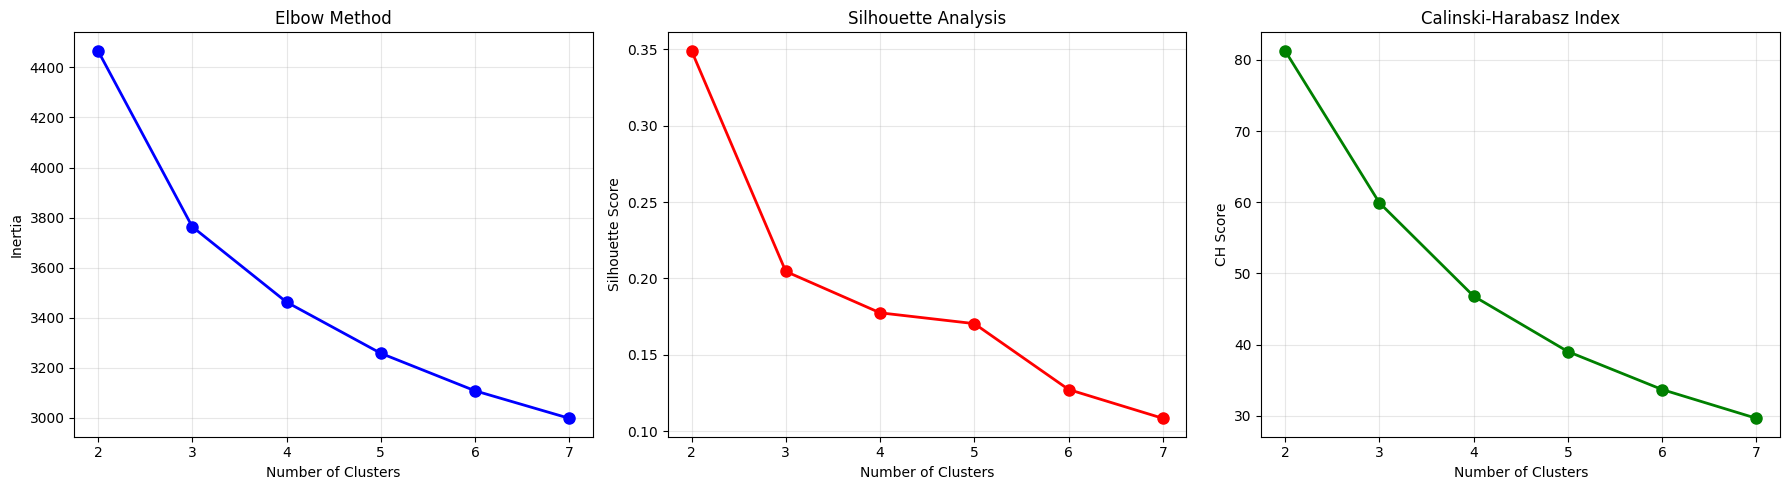


OPTIMAL CLUSTER SELECTION:
Silhouette method suggests: 2 clusters
Calinski-Harabasz suggests: 2 clusters


In [555]:
# used code snippet from homework (this one was generated by llm)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score


X_cluster_scaled = StandardScaler().fit_transform(df.values)

# Determine optimal number of clusters using multiple methods
inertia = []
silhouette_scores = []
ch_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
        ch_scores.append(calinski_harabasz_score(X_cluster_scaled, kmeans.labels_))

# Plot evaluation metrics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.grid(True, alpha=0.3)

# Silhouette score plot
ax2.plot(range(2, 8), silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')
ax2.grid(True, alpha=0.3)

# Calinski-Harabasz score plot
ax3.plot(range(2, 8), ch_scores, 'go-', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('CH Score')
ax3.set_title('Calinski-Harabasz Index')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Automated optimal k selection
optimal_k_silhouette = range(2, 8)[np.argmax(silhouette_scores)]
optimal_k_ch = range(2, 8)[np.argmax(ch_scores)]

print(f"\nOPTIMAL CLUSTER SELECTION:")
print(f"Silhouette method suggests: {optimal_k_silhouette} clusters")
print(f"Calinski-Harabasz suggests: {optimal_k_ch} clusters")



 we will create 2 clusters, because elbow, Silhouette and Calinski-Harabasz methods suggest us to use 2 clusters

Cluster sizes:
 Cluster 0: 43 observations
 Cluster 1: 89 observations

Centroids (original scale):
   Country  Business environment_2022  Business sophistication index_2022  \
0  65.2093                    58.5907                             49.1628   
1  67.1236                    42.3640                             23.4989   

   Citable documents H-index_2022  Creative goods and services_2022  \
0                         43.0419                           31.7070   
1                          9.5079                           10.9652   

   Creative goods exports, % total trade_2022  Creative outputs index_2022  \
0                                     31.0628                      38.4860   
1                                      8.9607                      13.5978   

   Cultural and creative services exports, % total trade_2022  \
0                                            29.0047            
1                                             7.2562            

   Domestic market scal

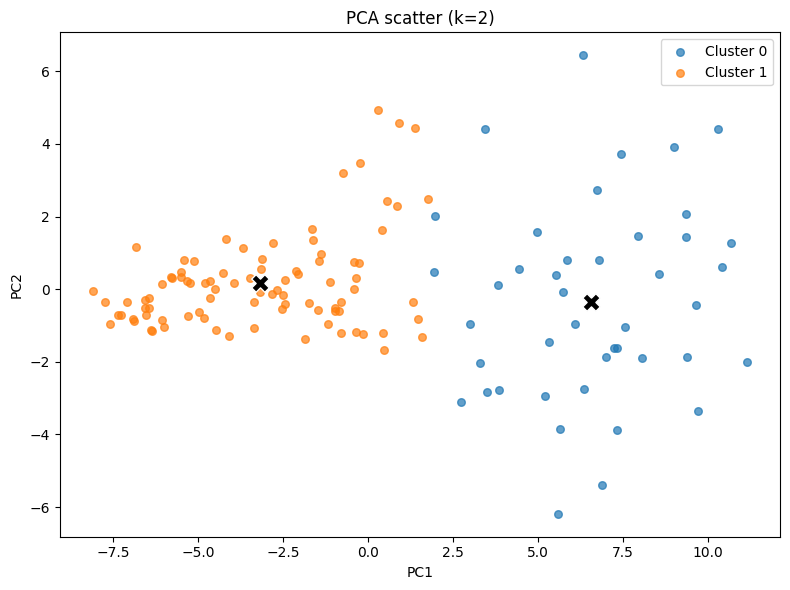


Silhouette score (average): 0.3489


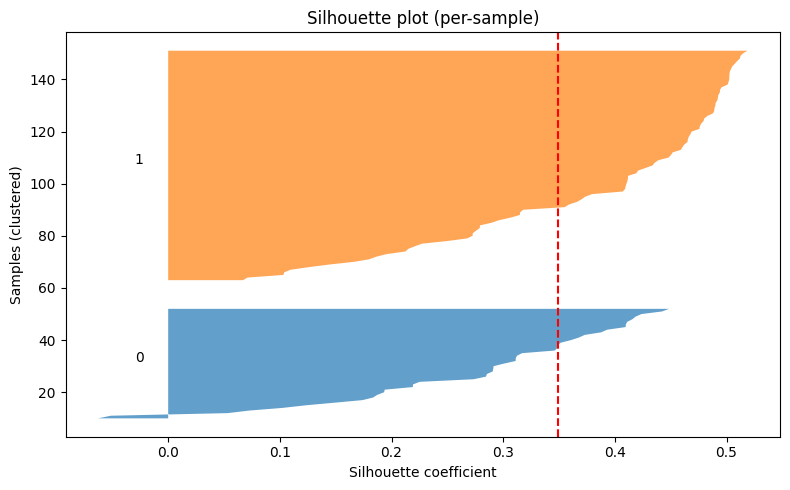

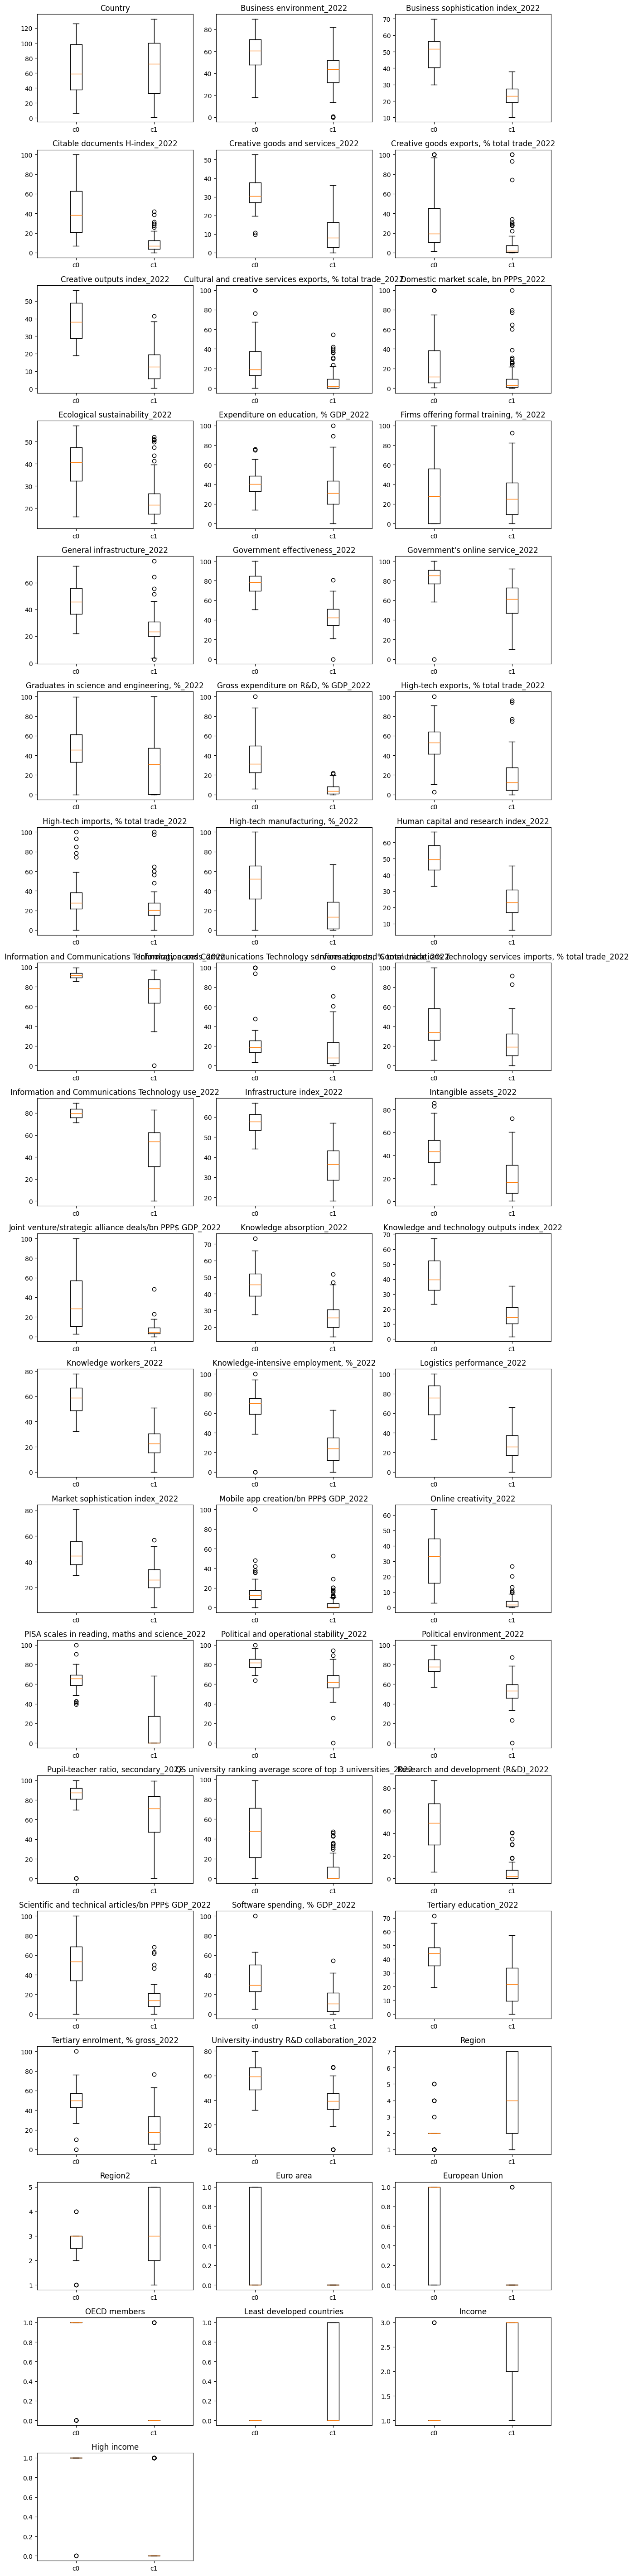

In [556]:
# used code snippet from homework (this one was generated by llm)


# lets create final cluster!



from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

optimal_k = 2


X_orig = df.reset_index(drop=True)
VARS = list(X_orig.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig.values)

# fit KMeans
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers_scaled = kmeans.cluster_centers_
centers_orig = scaler.inverse_transform(centers_scaled)

# print basic info
print("Cluster sizes:")
(unique, counts) = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f" Cluster {u}: {c} observations")
print("\nCentroids (original scale):")
print(pd.DataFrame(centers_orig, columns=VARS).round(4))

# 1) PCA scatter (PC1 vs PC2) with centroids
pca = PCA(n_components=2, random_state=0)
pcs = pca.fit_transform(X_scaled)
centers_pcs = pca.transform(centers_scaled)

plt.figure(figsize=(8,6))
for lab in sorted(np.unique(labels)):
    mask = labels == lab
    plt.scatter(pcs[mask,0], pcs[mask,1], s=30, label=f'Cluster {lab}', alpha=0.7)
plt.scatter(centers_pcs[:,0], centers_pcs[:,1], marker='X', s=160, c='k', edgecolor='w')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'PCA scatter (k={optimal_k})')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Silhouette average and simple plot
sil_avg = silhouette_score(X_scaled, labels)
print(f"\nSilhouette score (average): {sil_avg:.4f}")

sample_sil_vals = silhouette_samples(X_scaled, labels)
plt.figure(figsize=(8,5))
y_lower = 10
for i, lab in enumerate(sorted(np.unique(labels))):
    vals = np.sort(sample_sil_vals[labels == lab])
    size_cluster = vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, vals, alpha=0.7)
    plt.text(-0.03, y_lower + 0.5 * size_cluster, str(lab))
    y_lower = y_upper + 10
plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.xlabel('Silhouette coefficient'); plt.ylabel('Samples (clustered)')
plt.title('Silhouette plot (per-sample)')
plt.tight_layout()
plt.show()

# 3) Boxplots of original variables by cluster
df_plot = X_orig.copy()
df_plot['cluster'] = labels
n_vars = len(VARS)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))
plt.figure(figsize=(4*n_cols, 3*n_rows))
unique_clusters = sorted(df_plot['cluster'].unique())
for i, col in enumerate(VARS, 1):
    plt.subplot(n_rows, n_cols, i)
    groups = [g[col].values for _, g in df_plot.groupby('cluster')]
    plt.boxplot(groups, labels=[f'c{c}' for c in unique_clusters])
    plt.title(col)
plt.tight_layout()
plt.show()

1.4 Describe the clusters. Each cluster should have its profile: name and detailed description in textual form based on the calculated statistical characteristic. Explain the selection of names

In [557]:
# used llm to generate code snipped below
# it uses my models and encoders, llm made it readable and helped to format repeating elements


df_clusters = X_orig.copy()
df_clusters['cluster'] = labels

# --- Basic cluster stats ---
cluster_sizes = df_clusters['cluster'].value_counts().sort_index()
centers_df = pd.DataFrame(centers_orig, columns=VARS)
overall_mean = df_clusters[VARS].mean()
overall_std = df_clusters[VARS].std(ddof=0).replace(0, np.nan)  # avoid div by zero

# --- Representative entities (closest to cluster center in scaled space) ---
def get_representatives(X_scaled, labels, centers_scaled, df, entity_col='Country', top_n=8):
    reps = {}
    n = X_scaled.shape[0]
    inds = np.arange(n)
    for cl in sorted(np.unique(labels)):
        mask = labels == cl
        if mask.sum() == 0:
            reps[cl] = []
            continue
        center = centers_scaled[cl]
        dists = np.linalg.norm(X_scaled - center, axis=1)
        cluster_inds = inds[mask]
        # сортируем по расстоянию внутри кластера
        cluster_dists = dists[mask]
        order = np.argsort(cluster_dists)[:top_n]
        chosen = cluster_inds[order]
        if entity_col in df.columns and entity_col is not None:
            reps[cl] = df.iloc[chosen][entity_col].astype(str).tolist()
        else:
            reps[cl] = df.index[chosen].astype(str).tolist()
    return reps

rep_dict = get_representatives(X_scaled, labels, centers_scaled, X_orig if 'Country' in X_orig.columns else df_clusters, entity_col='Country' if 'Country' in X_orig.columns else None)

# --- Decode representative country codes back to names using your LabelEncoder mappings ---
# This uses ONLY the `mappings` dict you created earlier:
# mappings = {'Country': {'Albania': 1, 'Algeria': 2, ...}, ...}

def decode_rep_dict_with_mappings(rep_dict, mappings):
    if not (isinstance(mappings, dict) and 'Country' in mappings):
        # nothing to decode
        return rep_dict

    # invert mappings['Country'] which is {country_name: code} -> {code: country_name}
    try:
        inv_country_map = {int(code): name for name, code in mappings['Country'].items()}
    except Exception:
        # fallback: try converting values to int if they are strings
        inv_country_map = {}
        for name, code in mappings['Country'].items():
            try:
                inv_country_map[int(code)] = name
            except Exception:
                try:
                    inv_country_map[int(float(code))] = name
                except Exception:
                    pass

    decoded = {}
    for cl, items in rep_dict.items():
        new_items = []
        for it in items:
            # try int conversion (handles '66', '66.0', 66, etc.)
            decoded_name = None
            # if item already exactly matches a country name (string), keep it
            if isinstance(it, str) and it in inv_country_map.values():
                decoded_name = it
            else:
                # try numeric conversions
                try:
                    key = int(float(it))
                    decoded_name = inv_country_map.get(key, None)
                except Exception:
                    decoded_name = None

            # final fallback: original string
            if decoded_name is None:
                new_items.append(str(it))
            else:
                new_items.append(decoded_name)
        decoded[cl] = new_items
    return decoded

# apply decoding
rep_dict = decode_rep_dict_with_mappings(rep_dict, mappings if 'mappings' in globals() else {})

# --- Heuristic names: map known variable substrings to friendly labels and keywords used for naming ---
friendly = {
    'Political environment': ['Political environment', 'Political_env', 'Political environment_2022'],
    'Government effectiveness': ['Government effectiveness', 'Government effectiveness_2022'],
    'Creative goods exports': ['Creative goods exports', 'Creative goods exports, % total trade_2022'],
    'STEM graduates': ['Graduates in science and engineering, %_2022', 'Graduates in science and engineering'],
    'Pupil–teacher ratio': ['Pupil-teacher ratio, secondary_2022', 'Pupil–teacher ratio'],
    'Education expenditure': ['Expenditure on education, % GDP_2022', 'Education expenditure']
}
# reverse lookup to produce readable labels
col_label = {}
for k, variants in friendly.items():
    for v in variants:
        col_label[v] = k

def pretty_name(col):
    return col_label.get(col, col)

# --- Build cluster profiles and auto-generate short names ---
profiles = []
for cl in sorted(cluster_sizes.index):
    size = int(cluster_sizes.loc[cl])
    center = centers_df.loc[cl]
    # compute z-scores of center relative to overall population
    z = (center - overall_mean) / overall_std
    z = z.replace([np.inf, -np.inf], np.nan).fillna(0)
    # choose standout features with |z| >= 0.5 (threshold can be tuned)
    pos = z[z >= 0.5].sort_values(ascending=False)
    neg = z[z <= -0.5].sort_values()
    # Compose name parts
    name_parts = []
    

    cluster_name = " & ".join(name_parts[:3])  # limit length

    # Build textual description lines for top features (top 5 by absolute z)
    top_feats = z.abs().sort_values(ascending=False).index[:6]
    feat_lines = []
    for f in top_feats:
        mean_val = center[f]
        avg_val = overall_mean[f]
        zval = z[f]
        # formatting numeric values
        mean_s = f"{mean_val:.2f}"
        avg_s = f"{avg_val:.2f}"
        feat_lines.append(f"- {pretty_name(f)}: {mean_s} (avg: {avg_s}; z={zval:.2f})")

    # representative countries (decoded now)
    reps = rep_dict.get(cl, [])
    rep_line = ", ".join(reps[:10]) if reps else "—"

    profiles.append({
        'cluster': cl,
        'name': cluster_name,
        'n': size,
        'representatives': rep_line,
        'features': feat_lines
    })

# --- Print human-readable profiles ---
for p in profiles:
    print(f"Cluster {p['cluster']} — {p['name']} (n={p['n']})")
    print("Representative countries:", p['representatives'])
    print("Cluster features:")
    for line in p['features']:
        print(line)
    print("-" * 60)

Cluster 0 —  (n=43)
Representative countries: Austria, Spain, Portugal, Poland, Belgium, Italy, Denmark, Netherlands
Cluster features:
- Business sophistication index_2022: 49.16 (avg: 31.86; z=1.22)
- PISA scales in reading, maths and science_2022: 64.54 (avg: 29.14; z=1.21)
- Knowledge workers_2022: 57.25 (avg: 34.38; z=1.17)
- High income: 0.95 (avg: 0.39; z=1.16)
- Human capital and research index_2022: 50.56 (avg: 32.63; z=1.16)
- Research and development (R&D)_2022: 47.58 (avg: 19.16; z=1.15)
------------------------------------------------------------
Cluster 1 —  (n=89)
Representative countries: Egypt, Arab Rep., El Salvador, Kyrgyz Republic, Georgia, Morocco, Dominican Republic, Jordan, Armenia
Cluster features:
- Business sophistication index_2022: 23.50 (avg: 31.86; z=-0.59)
- PISA scales in reading, maths and science_2022: 12.04 (avg: 29.14; z=-0.59)
- Knowledge workers_2022: 23.33 (avg: 34.38; z=-0.56)
- High income: 0.11 (avg: 0.39; z=-0.56)
- Human capital and research i

In [558]:
# used llm to oragenise my ideas in md snippet below

Cluster 0 — Representative countries (examples): Austria, Spain, Portugal, Poland, Belgium, Italy, Denmark, Netherlands. This cluster shows well-above-average innovation and human-capital performance: business sophistication 49.16 vs 31.86, PISA 64.54 vs 29.14, knowledge workers 57.25 vs 34.38, human-capital & research index 50.56 vs 32.63, and R&D 47.58 vs 19.16 (cluster mean vs dataset mean). Most members are high-income (0.95 vs 0.39). A concise, accurate name is “Advanced innovation economies” - chosen because the cluster consistently overperforms on governance, education outcomes and innovation metrics.

Cluster 1 - Representative countries (examples): Egypt, El Salvador, Kyrgyz Republic, Georgia, Morocco, Dominican Republic, Jordan, Armenia. This cluster has below-average performance on the same innovation and education indicators: business sophistication 23.50 vs 31.86, PISA 12.04 vs 29.14, knowledge workers 23.33 vs 34.38, human-capital & research index 23.96 vs 32.63, and R&D 5.43 vs 19.16. Few members are high-income (0.11 vs 0.39). A better name than the automatic label is “Lower-capacity / developing economies” - chosen because the cluster is defined by weaker innovation systems and human-capital outcomes relative to the sample.

2.1.Do the descriptive analysis of all the variables which will be used in regression analysis. Prove that the selected predictors could be used simultaneously in one regression model.

In [559]:
predicted_var = 'Political environment_2022'
df[predicted_var]

0      53.3
1      76.1
2      49.0
3      83.7
4      36.9
       ... 
134    51.6
135    53.2
136    62.2
137    78.2
138    76.0
Name: Political environment_2022, Length: 132, dtype: float64

In [560]:
# find out corr of continuous variables with each other (including target var)


numeric_cols = df.select_dtypes(include=[np.number]).columns.to_numpy()

df[numeric_cols].corr()

,Country,Business environment_2022,Business sophistication index_2022,Citable documents H-index_2022,Creative goods and services_2022,"Creative goods exports, % total trade_2022",Creative outputs index_2022,"Cultural and creative services exports, % total trade_2022","Domestic market scale, bn PPP$_2022",Ecological sustainability_2022,...,"Tertiary enrolment, % gross_2022",University-industry R&D collaboration_2022,Region,Region2,Euro area,European Union,OECD members,Least developed countries,Income,High income
Country,1.000000,-0.000666,0.004488,0.020466,0.043662,0.137886,0.047966,0.040602,0.030141,-0.028785,...,-0.124990,0.024020,0.053557,0.052497,-0.082621,-0.085024,-0.036007,0.043242,-0.093945,0.058594
Business environment_2022,-0.000666,1.000000,0.523083,0.376547,0.400947,0.194081,0.430982,0.277058,0.191184,0.202476,...,0.273803,0.759305,-0.190172,-0.072562,0.153601,0.104429,0.315914,-0.198400,-0.373283,0.420853
Business sophistication index_2022,0.004488,0.523083,1.000000,0.766317,0.743201,0.376012,0.858586,0.607467,0.395154,0.597735,...,0.635783,0.732716,-0.503142,-0.278194,0.449959,0.528001,0.710892,-0.460060,-0.625490,0.708961
Citable documents H-index_2022,0.020466,0.376547,0.766317,1.000000,0.551333,0.329104,0.765391,0.377403,0.715857,0.376941,...,0.544010,0.615951,-0.327001,-0.221381,0.307628,0.356881,0.684447,-0.328444,-0.520818,0.579056
Creative goods and services_2022,0.043662,0.400947,0.743201,0.551333,1.000000,0.498471,0.739334,0.621691,0.234104,0.666987,...,0.529711,0.544774,-0.422825,-0.197669,0.406702,0.481268,0.573388,-0.358986,-0.512674,0.591911
"Creative goods exports, % total trade_2022",0.137886,0.194081,0.376012,0.329104,0.498471,1.000000,0.398163,0.049937,0.324551,0.281340,...,0.235795,0.336466,-0.396644,-0.239263,0.065216,0.208062,0.276528,-0.241010,-0.172302,0.226999
Creative outputs index_2022,0.047966,0.430982,0.858586,0.765391,0.739334,0.398163,1.000000,0.546834,0.473346,0.593174,...,0.656988,0.630172,-0.497109,-0.267928,0.435419,0.497772,0.643635,-0.481090,-0.537813,0.631173
"Cultural and creative services exports, % total trade_2022",0.040602,0.277058,0.607467,0.377403,0.621691,0.049937,0.546834,1.000000,0.121398,0.481340,...,0.371815,0.349632,-0.206664,-0.055168,0.377265,0.457454,0.348603,-0.232066,-0.408154,0.441740
"Domestic market scale, bn PPP$_2022",0.030141,0.191184,0.395154,0.715857,0.234104,0.324551,0.473346,0.121398,1.000000,0.022262,...,0.259086,0.367620,-0.209929,-0.253045,0.055506,0.034314,0.300434,-0.238370,-0.145522,0.198435
Ecological sustainability_2022,-0.028785,0.202476,0.597735,0.376941,0.666987,0.281340,0.593174,0.481340,0.022262,1.000000,...,0.525967,0.349991,-0.473359,-0.197926,0.531334,0.652092,0.518552,-0.397679,-0.476938,0.547776


In [561]:
corr_with_target = df[numeric_cols].corr()[predicted_var].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[predicted_var], errors='ignore').dropna()
corr_with_target

Government effectiveness_2022                                                     0.976950
Political and operational stability_2022                                          0.954470
Infrastructure index_2022                                                         0.827178
Business sophistication index_2022                                                0.809181
Information and Communications Technology use_2022                                0.787894
Human capital and research index_2022                                             0.787665
Logistics performance_2022                                                        0.772078
PISA scales in reading, maths and science_2022                                    0.768141
Online creativity_2022                                                            0.749619
High income                                                                       0.741099
Knowledge workers_2022                                                            0.740601

In [562]:

# lets consider that the module of pairwise corr of predictor vars must be < 0.5

variables_specified_in_task = ['Region2', 'Least developed countries', 'Euro area']

selected_continuous_variables = ['Government effectiveness_2022', 'Creative goods exports, % total trade_2022', 'Graduates in science and engineering, %_2022', 'Pupil-teacher ratio, secondary_2022', 'Expenditure on education, % GDP_2022'] 


In [563]:

df[selected_continuous_variables+variables_specified_in_task].corr()

,Government effectiveness_2022,"Creative goods exports, % total trade_2022","Graduates in science and engineering, %_2022","Pupil-teacher ratio, secondary_2022","Expenditure on education, % GDP_2022",Region2,Least developed countries,Euro area
Government effectiveness_2022,1.000000,0.333040,0.312504,0.409506,0.333024,-0.245234,-0.486064,0.431696
"Creative goods exports, % total trade_2022",0.333040,1.000000,0.187652,0.202721,-0.058064,-0.239263,-0.241010,0.065216
"Graduates in science and engineering, %_2022",0.312504,0.187652,1.000000,0.296208,0.085254,-0.122939,-0.283757,0.182701
"Pupil-teacher ratio, secondary_2022",0.409506,0.202721,0.296208,1.000000,0.076668,-0.147791,-0.431612,0.250484
"Expenditure on education, % GDP_2022",0.333024,-0.058064,0.085254,0.076668,1.000000,0.012283,-0.277699,0.088231
Region2,-0.245234,-0.239263,-0.122939,-0.147791,0.012283,1.000000,0.435430,-0.004872
Least developed countries,-0.486064,-0.241010,-0.283757,-0.431612,-0.277699,0.435430,1.000000,-0.194114
Euro area,0.431696,0.065216,0.182701,0.250484,0.088231,-0.004872,-0.194114,1.000000


In [564]:
# lets check corr of selected vars with target


corr_with_target = df[[predicted_var] + variables_specified_in_task + selected_continuous_variables].corr()[predicted_var].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop(labels=[predicted_var], errors='ignore').dropna()
corr_with_target

Government effectiveness_2022                   0.976950
Least developed countries                       0.464241
Pupil-teacher ratio, secondary_2022             0.435145
Euro area                                       0.420070
Creative goods exports, % total trade_2022      0.324164
Graduates in science and engineering, %_2022    0.313906
Expenditure on education, % GDP_2022            0.302729
Region2                                         0.247869
Name: Political environment_2022, dtype: float64

We have chosen variables that are suitable because they have a low correlation between each other and their correlation with the target is higher than that of the other acceptable ones

2.2.Create a linear regression model. Formulate the research hypotheses which will be verified during the regression analysis.

In [565]:
# used this code snipped from hw 5 


# Minimal regression + RMSE function
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# settings

predicted_var = 'Political environment_2022'


X = df[selected_continuous_variables+variables_specified_in_task]
y = df[predicted_var].astype(float)

# fit OLS
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()






# define RMSE function
def root_mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# predictions and metrics
y_pred = model.predict(Xc)
rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse  = mean_squared_error(y, y_pred)

# print results
print(model.summary())
print("\nApproximate equation:")
coefs = model.params.round(4)
intercept = float(coefs.get("const", 0.0))
terms = " + ".join(f"{coefs.get(col,0.0)}*{col}" for col in X.columns)
print(f"{predicted_var} = {intercept} + {terms}")

print("\nGoodness-of-fit:")


print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))
print('Mean Absolute Error = {:,.2f}'.format(mae))
print('Mean Squared Error  = {:,.2f}'.format(mse))
print('Root Mean Squared Error = {:,.2f}'.format(rmse))

# --- coefficient table with p-values ---
coef_table = model.summary2().tables[1].loc[:, ["Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]"]]
coef_table = coef_table.rename(columns={"Coef.":"coef", "Std.Err.":"std_err", "P>|t|":"pvalue"})


# --- split into significant and nonsignificant (alpha = 0.05) ---
alpha = 0.05
significant = coef_table[coef_table["pvalue"] < alpha].copy()
nonsignificant = coef_table[coef_table["pvalue"] >= alpha].copy()

print("\nStatistically significant model parameters (p < 0.05):")
if significant.shape[0] == 0:
    print("  (none)")
else:
    print(significant.round(4).to_string())

print("\nStatistically nonsignificant model parameters (p >= 0.05):")
if nonsignificant.shape[0] == 0:
    print("  (none)")
else:
    print(nonsignificant.round(4).to_string())





                                OLS Regression Results                                
Dep. Variable:     Political environment_2022   R-squared:                       0.957
Model:                                    OLS   Adj. R-squared:                  0.954
Method:                         Least Squares   F-statistic:                     343.3
Date:                        Fri, 07 Nov 2025   Prob (F-statistic):           2.81e-80
Time:                                20:59:17   Log-Likelihood:                -348.61
No. Observations:                         132   AIC:                             715.2
Df Residuals:                             123   BIC:                             741.2
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [566]:
# used llm for markdown snippet to make it more readable



research hypotheses:




## H1 — Government effectiveness_2022  
**H0 (Null hypothesis):** `Government effectiveness_2022` has no effect on `Political environment_2022` — the coefficient equals zero (`coef of Government_effectiveness = 0`).  
**H1 (Alternative hypothesis):** Higher government effectiveness is associated with a higher `Political environment_2022` (`coef of Government_effectiveness > 0`).

---

## H2 — Creative goods exports, % total trade_2022  
**H0:** `Creative goods exports, % total trade_2022` has no effect on `Political environment_2022` — the coefficient equals zero (`coef of CreativeExports = 0`).  
**H1:** A higher share of creative goods exports in total trade is associated with a more favorable `Political environment_2022` (`coef of CreativeExports > 0`).

---

## H3 — Graduates in science and engineering, %_2022  
**H0:** The share of graduates in science and engineering has no effect on `Political environment_2022` — the coefficient equals zero (`coef of GraduatesSE = 0`).  
**H1:** A higher share of science and engineering graduates is associated with a more favorable `Political environment_2022` (`coef of GraduatesSE > 0`).

---

## H4 — Pupil-teacher ratio, secondary_2022  
**H0:** `Pupil-teacher ratio, secondary_2022` has no effect on `Political environment_2022` — the coefficient equals zero (`coef of PupilTeacher = 0`).  
**H1:** A higher pupil–teacher ratio (more students per teacher) is associated with a worse `Political environment_2022` (`coef of PupilTeacher < 0`).

---

## H5 — Expenditure on education, % GDP_2022  
**H0:** `Expenditure on education, % GDP_2022` has no effect on `Political environment_2022` — the coefficient equals zero (`coef of EduExpenditure = 0`).  
**H1:** Higher education expenditure (as % of GDP) is associated with an improved `Political environment_2022` (`coef of EduExpenditure > 0`).

---

## H6 — Region2  
**H0 (Null hypothesis):** `Region2` has no effect on `Political environment_2022` — all `Region2`-related coefficients equal zero (`coef of Region2 = 0`).  
**H1 (Alternative hypothesis):** At least one `Region2` category differs in average `Political environment_2022` from the reference category (some `coef of Region2 ≠ 0`).

---

## H7 — Least developed countries  
**H0 (Null hypothesis):** Being classified as a `Least developed country` has no effect on `Political environment_2022` — the coefficient equals zero (`coef of LeastDeveloped = 0`).  
**H1 (Alternative hypothesis):** Being a `Least developed country` affects `Political environment_2022`; specifically, membership is associated with a higher `Political environment_2022` (`coef of LeastDeveloped > 0`).

---

## H8 — Euro area  
**H0 (Null hypothesis):** `Euro area` membership has no effect on `Political environment_2022` — the coefficient equals zero (`coef of EuroArea = 0`).  
**H1 (Alternative hypothesis):** `Euro area` membership affects `Political environment_2022`; specifically, membership is associated with a lower `Political environment_2022` (`coef of EuroArea < 0`).

2.3.Specify the regression equation. Assess the goodness-of-fit of the model.

In [567]:
# used this code snippet from hw 5

# --- Regression equation (approx) ---
params = model.params.round(4)
intercept = float(params.get("const", 0.0))
terms = [f"{params.get(col,0.0)}*{col}" for col in X.columns]
equation = predicted_var + " = {:.4f} + {}".format(intercept, " + ".join(terms))
print("\nRegression equation (approx):")
print(equation)


Regression equation (approx):
Political environment_2022 = 16.1289 + 0.8146*Government effectiveness_2022 + -0.0061*Creative goods exports, % total trade_2022 + 0.0031*Graduates in science and engineering, %_2022 + 0.0305*Pupil-teacher ratio, secondary_2022 + -0.0159*Expenditure on education, % GDP_2022 + -0.2009*Region2 + 1.4232*Least developed countries + -0.3504*Euro area


In [568]:

print("\nGoodness-of-fit:")


print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))
print('Mean Absolute Error = {:,.2f}'.format(mae))
print('Mean Squared Error  = {:,.2f}'.format(mse))
print('Root Mean Squared Error = {:,.2f}'.format(rmse))

# --- coefficient table with p-values ---
coef_table = model.summary2().tables[1].loc[:, ["Coef.", "Std.Err.", "t", "P>|t|", "[0.025", "0.975]"]]
coef_table = coef_table.rename(columns={"Coef.":"coef", "Std.Err.":"std_err", "P>|t|":"pvalue"})


# --- split into significant and nonsignificant (alpha = 0.05) ---
alpha = 0.05
significant = coef_table[coef_table["pvalue"] < alpha].copy()
nonsignificant = coef_table[coef_table["pvalue"] >= alpha].copy()

print("\nStatistically significant model parameters (p < 0.05):")
if significant.shape[0] == 0:
    print("  (none)")
else:
    print(significant.round(4).to_string())

print("\nStatistically nonsignificant model parameters (p >= 0.05):")
if nonsignificant.shape[0] == 0:
    print("  (none)")
else:
    print(nonsignificant.round(4).to_string())



Goodness-of-fit:
R^2 = 0.957134
F-test significance = 0.000000
Mean Absolute Error = 2.52
Mean Squared Error  = 11.52
Root Mean Squared Error = 3.39

Statistically significant model parameters (p < 0.05):
                                        coef  std_err        t  pvalue   [0.025   0.975]
const                                16.1289   1.5966  10.1023  0.0000  12.9686  19.2892
Government effectiveness_2022         0.8146   0.0216  37.6495  0.0000   0.7718   0.8574
Pupil-teacher ratio, secondary_2022   0.0305   0.0135   2.2560  0.0258   0.0037   0.0572

Statistically nonsignificant model parameters (p >= 0.05):
                                                coef  std_err       t  pvalue  [0.025  0.975]
Creative goods exports, % total trade_2022   -0.0061   0.0130 -0.4659  0.6421 -0.0318  0.0197
Graduates in science and engineering, %_2022  0.0031   0.0119  0.2573  0.7974 -0.0204  0.0265
Expenditure on education, % GDP_2022         -0.0159   0.0181 -0.8771  0.3822 -0.0517  0.0200
Re

Model is statistically significant. Model explains 95% of the variation of the dependent variable.

2.4.Provide a detailed interpretation of the relationship between each predictor and the dependent variable. 

In [569]:
# the following mardown fragment was generated using llm as it is quite large and has a template structure

Constant (16.1289): when all explanatory variables equal zero, the expected value of Political environment_2022 is approximately 16.1289.

On average, a one-unit increase in Government effectiveness_2022 is associated with an increase in Political environment_2022 of about +0.8146 units, holding other variables constant.

On average, a one-unit increase in Creative goods exports, % total trade_2022 is associated with a change in Political environment_2022 of about −0.0061 units, holding other variables constant.

On average, a one-unit increase in Graduates in science and engineering, %_2022 is associated with an increase in Political environment_2022 of about +0.0031 units, holding other variables constant.

On average, a one-unit increase in Pupil-teacher ratio, secondary_2022 is associated with an increase in Political environment_2022 of about +0.0305 units, holding other variables constant.

On average, a one-percentage-point increase in Expenditure on education, % GDP_2022 is associated with a decrease in Political environment_2022 of about −0.0159 units, holding other variables constant.

The coefficient on Region2 (−0.2009) implies that, given the current integer encoding of Region2, a one-unit increase in the region code is associated with a decrease in Political environment_2022 of about −0.2009 units; a difference of d code units implies approximately d * (−0.2009) units of change (interpretation depends on how Region2 is coded).

The coefficient on Least developed countries (+1.4232) indicates that, all else equal, being classified as a “Least developed country” (assumed binary 0/1) is associated with an increase in Political environment_2022 of about +1.4232 units relative to the reference group.

The coefficient on Euro area (−0.3504) indicates that, all else equal, being in the “Euro area” category (assumed binary 0/1) is associated with a decrease in Political environment_2022 of about −0.3504 units relative to the reference group.

In [570]:
# used llm to make markdown snippet more readable and because there are a lot of repeating parts here

interpretation in terms of our research hypotheses:


**H1 — Government effectiveness_2022 (coef = +0.8146)** — Result: **Supports H1**.  
A one-unit increase in Government effectiveness_2022 is associated with = +0.8146 units in Political environment_2022.

**H2 — Creative goods exports, % total trade_2022 (coef = −0.0061)** — Result: **Supports H0**.  
A one percentage-point increase in the share of creative goods exports is associated with = −0.0061 units in Political environment_2022.

**H3 — Graduates in science and engineering, %_2022 (coef = +0.0031)** — Result: **Supports H1**.  
A one percentage-point increase in the share of graduates in science and engineering is associated with = +0.0031 units in Political environment_2022.

**H4 — Pupil-teacher ratio, secondary_2022 (coef = +0.0305)** — Result: **Supports H0**.  
A one-unit increase in the pupil–teacher ratio is associated with = +0.0305 units in Political environment_2022.

**H5 — Expenditure on education, % GDP_2022 (coef = −0.0159)** — Result: **Supports H0**.  
A one percentage-point increase in education expenditure (as % of GDP) is associated with = −0.0159 units in Political environment_2022.

**H6 — Region2 (coef = −0.2009 per code unit)** — Result: **Supports H1**.  
A one-unit increase in the Region2 code is associated with = −0.2009 units in Political environment_2022 (interpretation depends on coding).

**H7 — Least developed countries (coef = +1.4232)** — Result: **Supports H1**.  
Being classified as a Least Developed Country coef of  is associated with = +1.4232 units in Political environment_2022 relative to the reference group.

**H8 — Euro area (coef = −0.3504)** — Result: **Supports H1**.  
Being in the Euro area coef of  is associated with = −0.3504 units in Political environment_2022 relative to the reference group.


2.5.Perform the model diagnostics.

### Residuals

In [571]:
# Some of the following code snippets are based on those presented in the seminars

p = stats.kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.331


unfortunately, p value is greater than 0.05 and this shows us that the model is not significant

<Axes: ylabel='Density'>

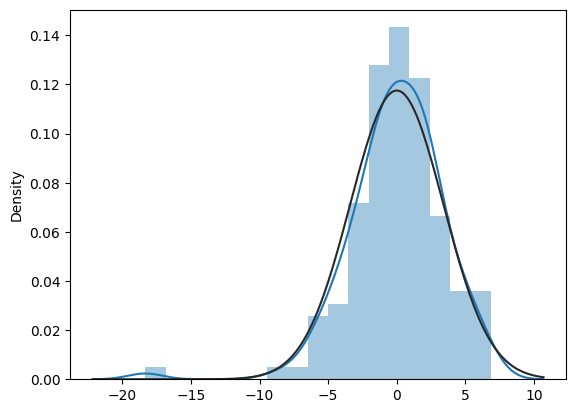

In [572]:
sns.distplot(model.resid, fit=stats.norm) 

Distribution of residuals is not different from the normal distribution.

### Heteroscedasticity 

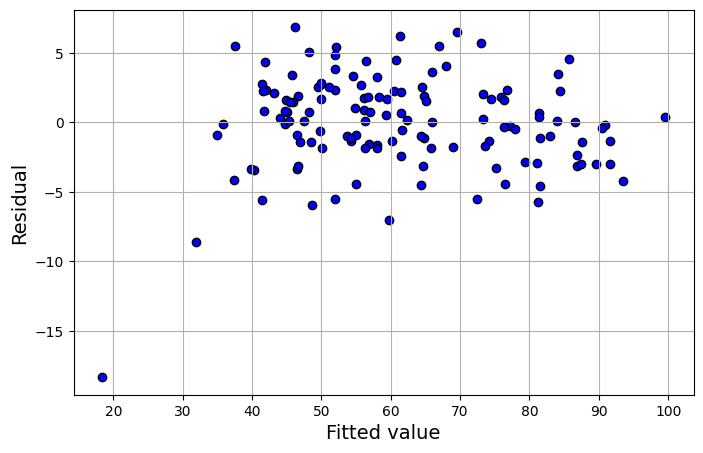

In [573]:
plt.figure(figsize=(8,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

There is a relationship between the residuals and the predicted values of the dependent variable. Therefore, there is no problem of heteroscedasticity.

### Multicollinearity 

In [574]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [575]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
2,1.174948,"Graduates in science and engineering, %_2022"
1,1.222072,"Creative goods exports, % total trade_2022"
4,1.251723,"Expenditure on education, % GDP_2022"
7,1.279297,Euro area
5,1.316502,Region2
3,1.381960,"Pupil-teacher ratio, secondary_2022"
6,1.775400,Least developed countries
0,1.943018,Government effectiveness_2022


There are no VIF values greater than 10. There is no multicollinearity problem.

### Outliers and influential cases

In [576]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Government effectiveness_2022,"dfb_Creative goods exports, % total trade_2022","dfb_Graduates in science and engineering, %_2022","dfb_Pupil-teacher ratio, secondary_2022","dfb_Expenditure on education, % GDP_2022",dfb_Region2,dfb_Least developed countries,dfb_Euro area,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.111799,-0.004945,-0.035622,-0.163138,-0.129111,-0.142915,0.277897,-0.286861,-0.035616,0.019553,1.500992,0.072448,0.419492,1.508760,0.421663
1,-0.034577,0.002760,0.142051,0.007067,0.006359,0.006121,0.033843,0.001631,-0.030658,0.002982,0.506159,0.094808,0.163809,0.504623,0.163312
2,0.015786,-0.009076,0.003733,-0.023569,0.004923,-0.025671,0.024703,-0.030264,-0.004530,0.000303,0.222627,0.052179,0.052235,0.221765,0.052033
3,0.062705,-0.111823,-0.257147,0.190272,-0.036066,-0.001652,0.003067,-0.035888,0.077476,0.015773,-0.961316,0.133157,-0.376772,-0.961017,-0.376655
4,-0.067541,0.144945,0.037668,-0.246981,0.038755,0.039246,-0.091557,0.116654,0.011448,0.012050,-1.024790,0.093599,-0.329314,-1.025001,-0.329382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.082405,-0.022771,-0.028743,-0.056876,0.010574,-0.021055,-0.065153,-0.021596,0.001538,0.001500,0.485770,0.054116,0.116191,0.484256,0.115829
135,-0.030808,0.023510,0.022747,-0.035342,-0.011980,-0.004990,0.047464,-0.004149,0.005959,0.000615,-0.327732,0.048978,-0.074375,-0.326539,-0.074104
136,0.018560,0.002867,-0.014556,-0.026681,0.012816,-0.002756,-0.027192,-0.000241,-0.005826,0.000244,0.198735,0.052761,0.046903,0.197957,0.046719
137,0.000549,-0.092404,-0.006451,0.037578,-0.005733,-0.009382,0.098071,-0.044216,0.063861,0.003583,-0.848897,0.042831,-0.179572,-0.847927,-0.179367


In [577]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()
# potential influential cases (these cases are also outliers)

12   -2.044004
Name: dffits, dtype: float64

In [578]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()
# potential outliers

12   -5.480937
Name: standard_resid, dtype: float64

2.6 Make final conclusions about the results of regression analysis